<a href="https://colab.research.google.com/github/MikhaellaJingCarumbana/-JingBeifong-.github.io/blob/main/Creating_a_difficulty_Assessment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn matplotlib seaborn
!pip install gspread pandas numpy
!pip install pandas numpy scikit-learn nltk tensorflow transformers

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
from google.colab import drive

# Mount to the root directory '/content/drive' first
drive.mount('/content/drive')

# Now you can access subfolders like 'MyDrive'

Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/Discrete Math Dataset - Summation - Sheet1 (2).csv')  # Adjust path as needed

# Display basic information about the dataset
print(df.info())  # Check data types and missing values
print(df.head())  # View first 5 rows

# Detect question score columns
question_scores = [col for col in df.columns if col.startswith('Q') and col[1:].isdigit() and len(col) <= 2]

# Now print detected columns
print("Detected Question Columns:", question_scores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Surname     183 non-null    object 
 1   Time Taken  183 non-null    object 
 2   Grade       183 non-null    float64
 3   Q1          183 non-null    object 
 4   Question 1  183 non-null    object 
 5   Response 1  183 non-null    object 
 6   Q2          183 non-null    object 
 7   Question 2  183 non-null    object 
 8   Response 2  183 non-null    object 
 9   Q3          183 non-null    object 
 10  Question 3  183 non-null    object 
 11  Response 3  183 non-null    object 
 12  Q4          183 non-null    object 
 13  Question 4  183 non-null    object 
 14  Response 4  183 non-null    object 
 15  Q5          183 non-null    object 
 16  Question 5  183 non-null    object 
 17  Response 5  183 non-null    object 
 18  Q6          183 non-null    object 
 19  Question 6  183 non-null    o

In [ ]:
print("Detected Question Columns:", question_scores)


Detected Question Columns: ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']


In [ ]:
print("\nNaN Counts Before Dropping:")
print(df[question_scores].isnull().sum())

df = df.dropna(subset=question_scores)

print("\nNaN Counts After Dropping:")
print(df[question_scores].isnull().sum())


NaN Counts Before Dropping:
Q1    0
Q2    0
Q3    0
Q4    0
Q5    0
Q6    0
Q7    0
Q8    0
dtype: int64

NaN Counts After Dropping:
Q1    0
Q2    0
Q3    0
Q4    0
Q5    0
Q6    0
Q7    0
Q8    0
dtype: int64


In [ ]:
# Convert question scores (Q#) to numeric
for col in question_scores:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical variables if needed
df['Surname'] = df['Surname'].astype(str)  # Ensure 'Surname' is treated as text


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Add a small jitter to columns that are constant (like all 0s) to force display
df_jittered = df[question_scores].copy()
for col in question_scores:
    if df_jittered[col].nunique() == 1:
      df_jittered[col] += np.random.uniform(-0.1, 0.1, size=df_jittered.shape[0])

df.dropna(subset=question_scores, inplace=True)


for col in question_scores:
    if df[col].nunique() == 1:  # If only one unique value (e.g., all 0s)
        df[col] += 0.001  # Add a small non-zero value to force display

for col in question_scores:
    print(f"{col}: Unique values -> {df[col].unique()}")



Q1: Unique values -> [1.5 0. ]
Q2: Unique values -> [1.5 0. ]
Q3: Unique values -> [2. 0.]
Q4: Unique values -> [2. 0.]
Q5: Unique values -> [2. 0.]
Q6: Unique values -> [2. 0.]
Q7: Unique values -> [2. 0.]
Q8: Unique values -> [3. 0.]


In [ ]:
print("Detected Question Columns:", question_scores)


Detected Question Columns: ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']


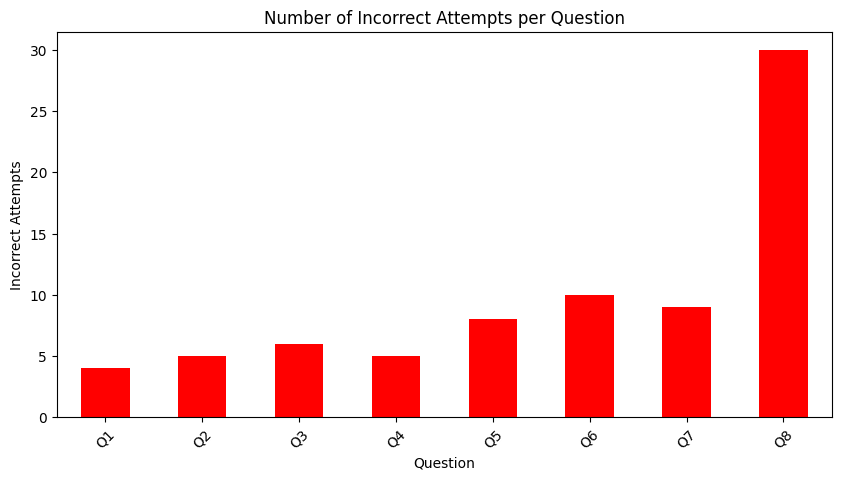

In [ ]:
# Count incorrect attempts (everything except max score)
max_scores = df[question_scores].max()  # Get max score for each question
error_counts = (df[question_scores] != max_scores).sum()  # Count all scores that are NOT max

# Ensure all questions appear in the plot (even if 0 incorrect attempts)
error_counts = error_counts.reindex(question_scores, fill_value=0)

# Visualize error patterns
plt.figure(figsize=(10, 5))
error_counts.plot(kind='bar', color='red')
plt.title("Number of Incorrect Attempts per Question")
plt.xlabel("Question")
plt.ylabel("Incorrect Attempts")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Assuming 'df' and 'question_scores' are already defined from previous cells

# Create df_difficulty from the error_counts you calculated earlier
df_difficulty = pd.DataFrame(error_counts, columns=['Incorrect Attempts'])
df_difficulty['Total Attempts'] = df.shape[0]  # Assuming each row is an attempt

# Now you can proceed with the calculation
df_difficulty['Incorrect Rate (%)'] = (df_difficulty['Incorrect Attempts'] / df_difficulty['Total Attempts']) * 100

# Display only the Incorrect Rate percentage
print(df_difficulty[['Incorrect Rate (%)']])

    Incorrect Rate (%)
Q1            2.247191
Q2            2.808989
Q3            3.370787
Q4            2.808989
Q5            4.494382
Q6            5.617978
Q7            5.056180
Q8           16.853933


In [ ]:
# Compute Incorrect Rate as a percentage
df_difficulty['Incorrect Rate (%)'] = (df_difficulty['Incorrect Attempts'] / df_difficulty['Total Attempts']) * 100

# Save only the Incorrect Rate (%) column while keeping the index - this saves the results
df_difficulty[['Incorrect Rate (%)']].to_csv('/content/Incorrect_Rate.csv', index=True)

# View first 5 rows
print(df_difficulty[['Incorrect Rate (%)']].head())


    Incorrect Rate (%)
Q1            2.247191
Q2            2.808989
Q3            3.370787
Q4            2.808989
Q5            4.494382


**MODEL 1: USING MULTIPLE LINEAR REGRESSION**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
df = pd.read_csv('/content/drive/MyDrive/Datasets/Discrete Math Dataset - Summation - Sheet1 (2).csv')  # First dataset
df_dif = pd.read_csv('/content/Incorrect_Rate.csv')  # Second dataset

# Display first few rows of both datasets
print("First dataset:")
print(df.head(), "\n")  # Display first dataset

print("Second dataset:")
print(df_dif.head())  # Display second dataset

def time_to_seconds(time_str):
    if isinstance(time_str, str):  # Ensure it's a string before processing
        match = re.match(r'(?:(\d+) mins )?(?:(\d+) secs)?', time_str)
        if match:
            minutes = int(match.group(1)) if match.group(1) else 0
            seconds = int(match.group(2)) if match.group(2) else 0
            return minutes * 60 + seconds
    return np.nan  # Return NaN if the value isn't a valid time format

# Apply time conversion function
df['Time Taken'] = df['Time Taken'].apply(time_to_seconds) # Changed df1 to df

# Fill missing values in "Time Taken" with the median value
df['Time Taken'] = df['Time Taken'].fillna(df['Time Taken'].median()) # Changed df1 to df

# Merge the Two Datasets
df_dif.rename(columns={"Unnamed: 0": "Q_ID"}, inplace=True) # Change 'Question' to 'Unnamed: 0' if needed, Changed df2 to df_dif

df_melted = df.melt(id_vars=['Surname', 'Time Taken', 'Grade'], # Changed df1 to df
                      value_vars=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'],
                      var_name="Q_ID", value_name="Score")

df_merged = df_melted.merge(df_dif, on="Q_ID", how="left")

# ✅ Removed the redundant and erroneous code blocks that used df1 and df2

# Ensure 'Incorrect Rate (%)' exists, handle if not
if 'Incorrect Rate (%)' not in df_merged.columns:
    print("Error: 'Incorrect Rate (%)' column not found after merge.")
    # You might need to calculate it or adjust the merge logic

X = df_merged[['Score', 'Time Taken', 'Grade']]  # Features
y = df_merged['Incorrect Rate (%)']  # Target

# Handle NaNs in target
if y.isna().sum() > 0:
    print("Warning: NaN values detected in target variable. Imputing with mean.")
    df_merged['Incorrect Rate (%)'].fillna(df_merged['Incorrect Rate (%)'].mean(), inplace=True)

for column in ['Score', 'Time Taken', 'Grade']:
    df_merged[column] = pd.to_numeric(df_merged[column], errors='coerce')  # Convert to numeric, invalid values become NaN
    df_merged[column] = df_merged[column].fillna(df_merged[column].median()) # Replace NaN with median
# Handle other missing data
df_merged['Time Taken'].fillna(df_merged['Time Taken'].median(), inplace=True)
df_merged['Grade'] = pd.to_numeric(df_merged['Grade'], errors='coerce')
df_merged['Grade'] = df_merged['Grade'].fillna(df_merged['Grade'].median())

# Select features and target (again after handling NaNs)
X = df_merged[['Score', 'Time Taken', 'Grade']]
y = df_merged['Incorrect Rate (%)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

print("✅ Model Trained Successfully!")
print("📌 Model Coefficients:", model.coef_)
print("📌 Intercept:", model.intercept_)
print("📊 Mean Absolute Error (MAE):", mae)
print("📊 Root Mean Squared Error (RMSE):", rmse)

First dataset:
    Surname       Time Taken  Grade   Q1  \
0  abadiano   7 mins 30 secs   16.0  1.5   
1    abella  16 mins 39 secs   11.0  1.5   
2    abella   5 mins 41 secs   16.0  1.5   
3  abellana  11 mins 12 secs   11.5  1.5   
4  ABELLANA   2 mins 46 secs   13.0  1.5   

                                          Question 1 Response 1   Q2  \
0  Solve for the following:\n \[ \sum_{i=1}^{20} ...         80  1.5   
1  Solve for the following:\n \[ \sum_{i=1}^{20} ...         80  1.5   
2  Solve for the following:\n \[ \sum_{i=1}^{20} ...         80  1.5   
3  Solve for the following:\n \[ \sum_{i=1}^{20} ...         80    0   
4  Solve for the following:\n \[ \sum_{i=1}^{20} ...         80  1.5   

                                          Question 2 Response 2 Q3  ...  \
0  Solve for the following:\n \[ \sum_{i=1}^{3} 7...        222  2  ...   
1  Solve for the following:\n \[ \sum_{i=1}^{3} 7...        222  2  ...   
2  Solve for the following:\n \[ \sum_{i=1}^{3} 7...        22

<ipython-input-133-916a71ec1643>:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Time Taken'].fillna(df_merged['Time Taken'].median(), inplace=True)


**Predicting Question Difficulty Using Machine Learning**

We are training four models to predict the difficulty of questions:


*   XGBoost (Extreme Gradient Boosting) – A powerful boosting algorithm that improves predictions by combining multiple weak learners.
*   LightGBM (Light Gradient Boosting Machine) – Similar to XGBoost but optimized for efficiency and faster training.
*   Random Forest – An ensemble model using multiple decision trees to improve accuracy and reduce overfitting.
*   Deep Neural Network (DNN) – A multi-layer perceptron designed to capture complex patterns in the data.
*   Multiple Linear Regression (MLR)









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor as DNN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import re

# Load datasets
df = pd.read_csv('/content/drive/MyDrive/Datasets/Discrete Math Dataset - Sequences - Sheet1 (1).csv')
df_dif = pd.read_csv('/content/Incorrect_Rate.csv')

# Function to convert time to seconds
def time_to_seconds(time_str):
    if isinstance(time_str, str):
        match = re.match(r'(?:(\d+) mins )?(?:(\d+) secs)?', time_str)
        if match:
            minutes = int(match.group(1)) if match.group(1) else 0
            seconds = int(match.group(2)) if match.group(2) else 0
            return minutes * 60 + seconds
    return np.nan

# Convert time column
df['Time Taken'] = df['Time Taken'].apply(time_to_seconds)
df['Time Taken'].fillna(df['Time Taken'].median(), inplace=True)

# Rename columns and merge datasets
df_dif.rename(columns={"Unnamed: 0": "Q_ID"}, inplace=True)
df_melted = df.melt(id_vars=['Surname', 'Time Taken', 'Grade'],
                     value_vars=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'],
                     var_name="Q_ID", value_name="Score")

df_merged = df_melted.merge(df_dif, on="Q_ID", how="left")

# Add 'Attempts' feature (count occurrences of each surname)
df_merged['Attempts'] = df_merged.groupby('Surname')['Surname'].transform('count')

# Handle missing values
df_merged['Incorrect Rate (%)'].fillna(df_merged['Incorrect Rate (%)'].mean(), inplace=True)
df_merged[['Score', 'Time Taken', 'Grade', 'Attempts']] = df_merged[['Score', 'Time Taken', 'Grade', 'Attempts']].apply(pd.to_numeric, errors='coerce')
numeric_columns = ['Score', 'Time Taken', 'Grade', 'Attempts', 'Incorrect Rate (%)']
df_merged[numeric_columns] = df_merged[numeric_columns].fillna(df_merged[numeric_columns].median())

# Select features and target
X = df_merged[['Score', 'Time Taken', 'Grade', 'Attempts']]
y = df_merged['Incorrect Rate (%)']

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Model Training
models = {
    "XGBoost": XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=100),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "DNN": DNN(hidden_layer_sizes=(10,), max_iter=2500, random_state=42),
    "MLR": LinearRegression()
}

results = {}
predictions = {}

for name, model in models.items():
    print(f"\n🔹 Training {name} Model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse}

    print(f"\n✅ {name} Training Complete!")
    print(f"📌 R² Score: {r2:.4f} (Higher is better, 1.0 means perfect fit)")
    print(f"📌 MAE: {mae:.4f} (Lower is better, represents avg error in predictions)")
    print(f"📌 RMSE: {rmse:.4f} (Lower is better, penalizes large errors more)")
    print("📊 Sample Predictions:")
    print(y_pred[:5])  # Print first 5 predictions
    print("------------------------------------------------------------")

# 🔥 Display Model Performance Summary
print("\n📊 Model Performance Summary:")
for model_name, metrics in results.items():
    print(f"\n🔹 {model_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("------------------------------------------------------------")


<ipython-input-134-89be2aed26ad>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time Taken'].fillna(df['Time Taken'].median(), inplace=True)
<ipython-input-134-89be2aed26ad>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl


🔹 Training XGBoost Model...

✅ XGBoost Training Complete!
📌 R² Score: -0.9836 (Higher is better, 1.0 means perfect fit)
📌 MAE: 1.4424 (Lower is better, represents avg error in predictions)
📌 RMSE: 1.6568 (Lower is better, penalizes large errors more)
📊 Sample Predictions:
[3.394446  3.4227138 2.9534757 2.944132  3.8585186]
------------------------------------------------------------

🔹 Training LightGBM Model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 4
[LightGBM] [Info] Start training from score 3.558785


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



✅ LightGBM Training Complete!
📌 R² Score: -0.2289 (Higher is better, 1.0 means perfect fit)
📌 MAE: 1.1493 (Lower is better, represents avg error in predictions)
📌 RMSE: 1.3041 (Lower is better, penalizes large errors more)
📊 Sample Predictions:
[3.41048636 3.49900794 3.21419525 3.36925077 4.44865812]
------------------------------------------------------------

🔹 Training Random Forest Model...

✅ Random Forest Training Complete!
📌 R² Score: -0.8293 (Higher is better, 1.0 means perfect fit)
📌 MAE: 1.3929 (Lower is better, represents avg error in predictions)
📌 RMSE: 1.5910 (Lower is better, penalizes large errors more)
📊 Sample Predictions:
[3.4068846  3.46104869 2.91385768 2.97732745 4.50234082]
------------------------------------------------------------

🔹 Training DNN Model...

✅ DNN Training Complete!
📌 R² Score: 0.0090 (Higher is better, 1.0 means perfect fit)
📌 MAE: 1.0109 (Lower is better, represents avg error in predictions)
📌 RMSE: 1.1710 (Lower is better, penalizes large er

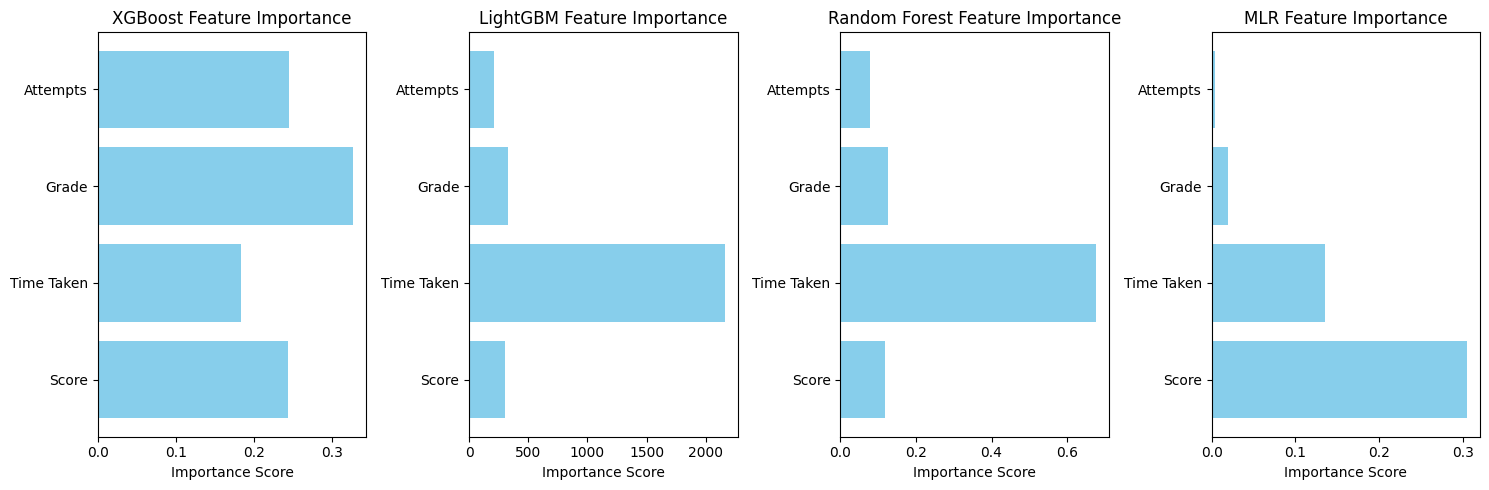

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importance from each model (if applicable)
feature_importance = {}

# XGBoost Feature Importance
if "XGBoost" in models:
    feature_importance["XGBoost"] = models["XGBoost"].feature_importances_

# LightGBM Feature Importance
if "LightGBM" in models:
    feature_importance["LightGBM"] = models["LightGBM"].feature_importances_

# Random Forest Feature Importance
if "Random Forest" in models:
    feature_importance["Random Forest"] = models["Random Forest"].feature_importances_

# MLR does not have built-in feature importance, but we can use absolute coefficients
if "MLR" in models:
    feature_importance["MLR"] = abs(models["MLR"].coef_)

# Feature names
feature_names = X.columns

# Plot feature importance for each model
fig, axes = plt.subplots(nrows=1, ncols=len(feature_importance), figsize=(15, 5))

for ax, (model_name, importance) in zip(axes, feature_importance.items()):
    ax.barh(feature_names, importance, color='skyblue')
    ax.set_title(f"{model_name} Feature Importance")
    ax.set_xlabel("Importance Score")

plt.tight_layout()
plt.show()


Feature importance tells us which variables (features) in our dataset have the most influence on the model’s predictions. It helps in understanding how much each feature contributes to the outcome.

For example, if we're predicting question difficulty based on Score, Time Taken, Grade, and Attempts, feature importance helps us determine which of these factors plays the biggest role in determining the difficulty.

DOCUMENTATION HERE: https://docs.google.com/document/d/1GfDgPMClXBYDz9_o1Viyxl5Y1fw9OpcHMA7XV8LLLLs/edit?usp=sharing

Eliminating the two worst performing model and keeping the two best performing models.

1.   LightGBM
2.   Multiple Linear Regression






LightGBM Feature Importance:
Score: 305.0000
Time Taken: 2160.0000
Grade: 326.0000
Attempts: 209.0000

MLR Feature Importance:
Score: 0.3048
Time Taken: 0.1349
Grade: 0.0195
Attempts: 0.0042


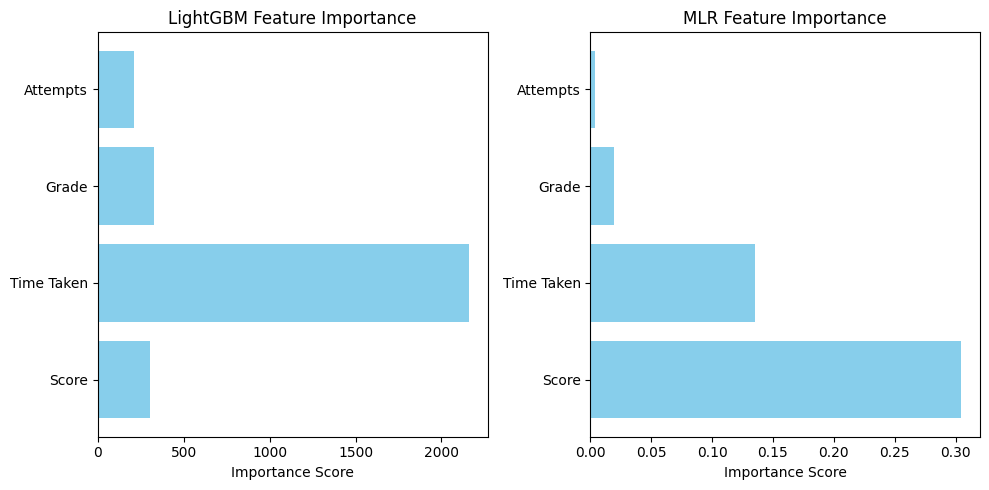

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importance from LightGBM and MLR only
feature_importance = {}

# LightGBM Feature Importance
if "LightGBM" in models:
    feature_importance["LightGBM"] = models["LightGBM"].feature_importances_
    print("\nLightGBM Feature Importance:")
    for feature, importance in zip(X.columns, feature_importance["LightGBM"]):
        print(f"{feature}: {importance:.4f}")

# MLR does not have built-in feature importance, but we can use absolute coefficients
if "MLR" in models:
    feature_importance["MLR"] = abs(models["MLR"].coef_)
    print("\nMLR Feature Importance:")
    for feature, importance in zip(X.columns, feature_importance["MLR"]):
        print(f"{feature}: {importance:.4f}")

# Feature names
feature_names = X.columns

# Plot feature importance for LightGBM and MLR
fig, axes = plt.subplots(nrows=1, ncols=len(feature_importance), figsize=(10, 5))

for ax, (model_name, importance) in zip(axes, feature_importance.items()):
    ax.barh(feature_names, importance, color='skyblue')
    ax.set_title(f"{model_name} Feature Importance")
    ax.set_xlabel("Importance Score")

plt.tight_layout()
plt.show()



**Feature Engineering (Enhancing Data Inputs)**



*   Create new features: Instead of just using raw "Time Taken" and "Score," create meaningful ratios (e.g., Score per Attempt = Score / Attempts).
*   Remove irrelevant features: If a feature has very low importance across all models, it might be adding noise.
*   Normalize/Scale features: Models like MLR and DNN benefit from standardized inputs (use MinMaxScaler or StandardScaler).
*   Handle missing values better: Instead of median imputation, test different strategies like KNN-imputation or predictive filling.





<ipython-input-137-d2ee2b43df22>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Score per Attempt'].fillna(0, inplace=True)  # Handling division by zero cases



LightGBM Feature Importance:
Score: 305.0000
Time Taken: 2160.0000
Grade: 326.0000
Attempts: 209.0000

MLR Feature Importance:
Score: 0.3048
Time Taken: 0.1349
Grade: 0.0195
Attempts: 0.0042


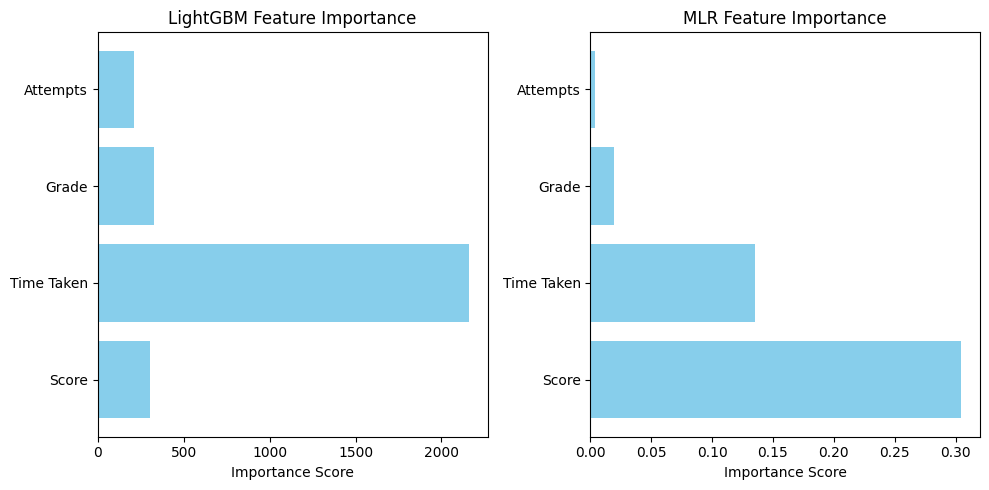

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer

# Feature Engineering: Adding 'Score per Attempt'


df_merged['Score per Attempt'] = df_merged['Score'] / df_merged['Attempts']
df_merged['Score per Attempt'].fillna(0, inplace=True)  # Handling division by zero cases

# Removing irrelevant features (based on prior importance analysis)
low_importance_features = ['FeatureX']  # Replace with actual low-importance features
df_merged = df_merged.drop(columns=low_importance_features, errors='ignore')

# Normalization/Scaling for MLR and DNN models
scaler = StandardScaler()  # Try MinMaxScaler() as an alternative
df_merged[['Score', 'Time Taken', 'Grade', 'Attempts', 'Score per Attempt']] = scaler.fit_transform(
    df_merged[['Score', 'Time Taken', 'Grade', 'Attempts', 'Score per Attempt']]
)

# Handling missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_merged[['Score', 'Time Taken', 'Grade', 'Attempts', 'Score per Attempt']] = imputer.fit_transform(
    df_merged[['Score', 'Time Taken', 'Grade', 'Attempts', 'Score per Attempt']]
)

# Extract feature importance from LightGBM and MLR only
feature_importance = {}

# LightGBM Feature Importance
if "LightGBM" in models:
    feature_importance["LightGBM"] = models["LightGBM"].feature_importances_
    print("\nLightGBM Feature Importance:")
    for feature, importance in zip(X.columns, feature_importance["LightGBM"]):
        print(f"{feature}: {importance:.4f}")

# MLR does not have built-in feature importance, but we can use absolute coefficients
if "MLR" in models:
    feature_importance["MLR"] = abs(models["MLR"].coef_)
    print("\nMLR Feature Importance:")
    for feature, importance in zip(X.columns, feature_importance["MLR"]):
        print(f"{feature}: {importance:.4f}")

# Feature names
feature_names = X.columns

# Plot feature importance for LightGBM and MLR
fig, axes = plt.subplots(nrows=1, ncols=len(feature_importance), figsize=(10, 5))

for ax, (model_name, importance) in zip(axes, feature_importance.items()):
    ax.barh(feature_names, importance, color='skyblue')
    ax.set_title(f"{model_name} Feature Importance")
    ax.set_xlabel("Importance Score")

plt.tight_layout()
plt.show()


**Modified Code for Comparison (LightGBM)**

This script will compare accuracy before and after adding Score per Attempt.


*   Train models without Score per Attempt and record accuracy.
*   Train models with Score per Attempt and compare accuracy.
*  Analyze feature importance to see if it contributes meaningfully






[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 4
[LightGBM] [Info] Start training from score -0.005041
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 5
[LightGBM] [Info] Start training from score -0.005041

LightGBM Performance Without 'Score per Attempt':
RMSE: 0.4442, R² Score: 0.8195

LightGBM Perf

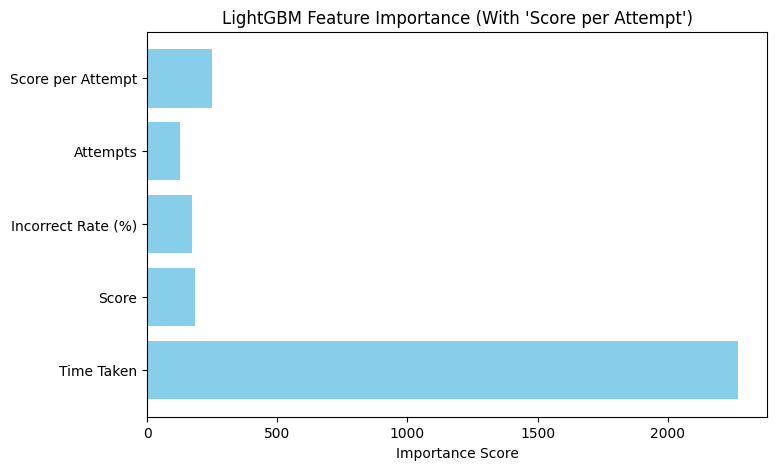

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Backup original dataframe
df_original = df_merged.copy()

# Drop non-numeric columns
non_numeric_cols = ['Surname', 'Q_ID']  # Add any other non-numeric columns if needed

df_numeric = df_original.drop(columns=non_numeric_cols, errors='ignore')

# Prepare Data (Without 'Score per Attempt')
df_no_score_attempt = df_numeric.drop(columns=['Score per Attempt'], errors='ignore')

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    df_no_score_attempt.drop(columns=['Grade']), df_no_score_attempt['Grade'], test_size=0.2, random_state=42
)

# Train LightGBM Without 'Score per Attempt'
lgbm_model = models["LightGBM"]
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate LightGBM
lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
lgbm_r2 = r2_score(y_test, y_pred_lgbm)

# --- NOW ADD 'Score per Attempt' ---

# Prepare Data (With 'Score per Attempt')
df_with_score_attempt = df_numeric.copy()

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    df_with_score_attempt.drop(columns=['Grade']), df_with_score_attempt['Grade'], test_size=0.2, random_state=42
)

# Train LightGBM With 'Score per Attempt'
lgbm_model.fit(X_train, y_train)
y_pred_lgbm_with = lgbm_model.predict(X_test)

# Evaluate LightGBM With 'Score per Attempt'
lgbm_rmse_with = np.sqrt(mean_squared_error(y_test, y_pred_lgbm_with))
lgbm_r2_with = r2_score(y_test, y_pred_lgbm_with)

# Print Results
print("\nLightGBM Performance Without 'Score per Attempt':")
print(f"RMSE: {lgbm_rmse:.4f}, R² Score: {lgbm_r2:.4f}")

print("\nLightGBM Performance With 'Score per Attempt':")
print(f"RMSE: {lgbm_rmse_with:.4f}, R² Score: {lgbm_r2_with:.4f}")

# Check Feature Importance
feature_importance = {
    "LightGBM": lgbm_model.feature_importances_
}

print("\nLightGBM Feature Importance (With 'Score per Attempt'):")
for feature, importance in zip(X_train.columns, feature_importance["LightGBM"]):
    print(f"{feature}: {importance:.4f}")

# Plot Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(X_train.columns, feature_importance["LightGBM"], color='skyblue')
plt.xlabel("Importance Score")
plt.title("LightGBM Feature Importance (With 'Score per Attempt')")
plt.show()


**Modified Code for Comparison (MLR)**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Backup original dataframe
df_original = df_merged.copy()

# Drop non-numeric columns
non_numeric_cols = ['Surname', 'Q_ID']
df_numeric = df_original.drop(columns=non_numeric_cols, errors='ignore')

# Feature Engineering
df_numeric['Accuracy Rate (%)'] = (df_numeric['Score'] / df_numeric['Grade']) * 100
df_numeric['Response Time per Question'] = df_numeric['Time Taken'] / df_numeric['Grade']
df_numeric['Time_Score_Interaction'] = df_numeric['Time Taken'] * df_numeric['Score']
df_numeric['Log_Time_Taken'] = np.log1p(df_numeric['Time Taken'])
df_numeric['Log_Attempts'] = np.log1p(df_numeric['Attempts'])

# Handle missing values
imputer = KNNImputer(n_neighbors=5)
df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Normalize features for MLR
scaler = StandardScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

print(df_numeric.head())  # Verify the new features


   Time Taken     Grade     Score  Incorrect Rate (%)  Attempts  \
0    1.851290  0.113941  0.720750            -1.13555 -0.981284   
1    1.264802 -0.644481 -0.253061            -1.13555  1.119354   
2   -0.110078  0.113941 -0.253061            -1.13555  1.119354   
3   -1.186908  0.366749  0.720750            -1.13555  1.119354   
4   -0.135717  0.366749  0.720750            -1.13555 -0.981284   

   Score per Attempt  Accuracy Rate (%)  Response Time per Question  \
0           1.301860           2.477073                    4.467121   
1          -0.998099          -0.104282                   -0.489061   
2          -0.998099          -1.241442                   -0.217872   
3          -0.789012           0.579928                   -0.835740   
4           1.301860           0.579928                   -0.055651   

   Time_Score_Interaction  Log_Time_Taken  Log_Attempts  
0                1.218459        1.262243     -1.020448  
1               -0.109417        1.070103      1.02523

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Now, let's try to determine which model would be better for difficulty assessment. I'll train both MLR and LightGBM, evaluate them using RMSE and R² Score, and compare their performance. Let's proceed with the code. 🚀

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Ensure df_numeric has all necessary numerical features
features = ['Time Taken', 'Grade', 'Score', 'Incorrect Rate (%)', 'Attempts', 'Score per Attempt']
df_numeric = df_merged[features]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    df_numeric.drop(columns=['Grade']), df_numeric['Grade'], test_size=0.2, random_state=42
)

# Standardizing features for MLR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLR Model
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)
y_pred_mlr = mlr_model.predict(X_test_scaled)

# Evaluate MLR
mlr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
mlr_r2 = r2_score(y_test, y_pred_mlr)

# Train LightGBM Model
lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate LightGBM
lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
lgbm_r2 = r2_score(y_test, y_pred_lgbm)

# Print comparison
print("\n📊 Model Performance Comparison:")
print("\n🔹 LightGBM Performance:")
print(f"RMSE: {lgbm_rmse:.4f}, R² Score: {lgbm_r2:.4f}")
print("\n🔹 MLR Performance:")
print(f"RMSE: {mlr_rmse:.4f}, R² Score: {mlr_r2:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 5
[LightGBM] [Info] Start training from score -0.005041

📊 Model Performance Comparison:

🔹 LightGBM Performance:
RMSE: 0.4632, R² Score: 0.8037

🔹 MLR Performance:
RMSE: 0.7398, R² Score: 0.4993


**With these results, we will go with LightGBM**

Now that we've determined that LightGBM is the best fit. We will now fine-tune the model to improve accuracy.

We will utilize Optuna for hyperparameter tuning.

In [ ]:
!pip install optuna lightgbm

**We'll define a function that trains LightGBM with different hyperparameters and returns the best ones.**


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Objective Function for Optuna
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0)
    }

    # Train model
    gbm = lgb.LGBMRegressor(**params)
    # Use early stopping callback
    gbm.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)] # Pass early stopping as a callback
    )
    # Predict and calculate RMSE
    y_pred = gbm.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE using NumPy
    return rmse

# Run Optimization (Change n_trials for longer tuning)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best Parameters
print("Best Parameters:", study.best_params)

[I 2025-04-27 23:53:53,944] A new study created in memory with name: no-name-9a541d53-fed3-45d4-8acd-66abe9743c1a
<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial

[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] feature_fraction is set=0.6400273858957142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6400273858957142
[LightGBM] [Warning] lambda_l2 is set=0.09809522016910205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09809522016910205
[LightGBM] [Warning] lambda_l1 is set=0.002278970691695158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002278970691695158
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] feature_fraction is set=0.6400273858957142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6400273858957142
[LightGBM] [Warning] lambda_l2 is set=0.09809522016910205, reg_lambda=0.0 will be ignored. Curr

[I 2025-04-27 23:53:54,184] Trial 10 finished with value: 1.1631012591934553 and parameters: {'num_leaves': 68, 'learning_rate': 0.18869702784091236, 'n_estimators': 52, 'max_depth': 4, 'min_data_in_leaf': 50, 'lambda_l1': 0.7486454228637364, 'lambda_l2': 3.1820853447740207, 'feature_fraction': 0.44371014046139273}. Best is trial 10 with value: 1.1631012591934553.
<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.44371014046139273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44371014046139273
[LightGBM] [Warning] lambda_l2 is set=3.1820853447740207, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1820853447740207
[LightGBM] [Warning] lambda_l1 is set=0.7486454228637364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7486454228637364
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.44371014046139273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44371014046139273
[LightGBM] [Warning] lambda_l2 is set=3.1820853447740207, reg_lambda=0.0 will be ignored. Current

[I 2025-04-27 23:53:54,373] Trial 13 finished with value: 1.1726570724597862 and parameters: {'num_leaves': 88, 'learning_rate': 0.07208073494847757, 'n_estimators': 67, 'max_depth': 3, 'min_data_in_leaf': 53, 'lambda_l1': 0.17594250139296855, 'lambda_l2': 0.11872023739109416, 'feature_fraction': 0.7497598365406314}. Best is trial 11 with value: 1.162692767996448.
<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.49557321540142346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49557321540142346
[LightGBM] [Warning] lambda_l2 is set=6.069782385523143, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.069782385523143
[LightGBM] [Warning] lambda_l1 is set=0.06987127020871198, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06987127020871198
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.49557321540142346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49557321540142346
[LightGBM] [Warning] lambda_l2 is set=6.069782385523143, reg_lambda=0.0 will be ignored. Current 

[I 2025-04-27 23:53:54,641] Trial 17 finished with value: 1.1721690865282077 and parameters: {'num_leaves': 11, 'learning_rate': 0.008804749500508968, 'n_estimators': 129, 'max_depth': 3, 'min_data_in_leaf': 29, 'lambda_l1': 1.3290895722548409e-08, 'lambda_l2': 1.327931346216724e-05, 'feature_fraction': 0.522884193632664}. Best is trial 11 with value: 1.162692767996448.
<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ip

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-142-f40354465958>:21: FutureWarning: suggest_uniform 

[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] feature_fraction is set=0.45645620176005913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45645620176005913
[LightGBM] [Warning] lambda_l2 is set=0.9235884782819784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9235884782819784
[LightGBM] [Warning] lambda_l1 is set=0.719480409698746, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.719480409698746
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] feature_fraction is set=0.45645620176005913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45645620176005913
[LightGBM] [Warning] lambda_l2 is set=0.9235884782819784, reg_lambda=0.0 will be ignored. Current v

[I 2025-04-27 23:53:55,097] Trial 24 finished with value: 1.1754508590420139 and parameters: {'num_leaves': 51, 'learning_rate': 0.04955431720416761, 'n_estimators': 266, 'max_depth': 5, 'min_data_in_leaf': 62, 'lambda_l1': 0.026813895132566806, 'lambda_l2': 0.010203466125571494, 'feature_fraction': 0.6819600194048167}. Best is trial 22 with value: 1.1620507379739116.
<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipyt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.681960

[I 2025-04-27 23:53:55,304] Trial 27 finished with value: 1.174579720543875 and parameters: {'num_leaves': 53, 'learning_rate': 0.04101594575859613, 'n_estimators': 97, 'max_depth': 4, 'min_data_in_leaf': 67, 'lambda_l1': 0.010999118913187092, 'lambda_l2': 0.02884945766852359, 'feature_fraction': 0.7004370828678537}. Best is trial 22 with value: 1.1620507379739116.
<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-142-f40354465958>:21: FutureWarning: suggest_uniform 

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.471852890168457, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.471852890168457
[LightGBM] [Warning] lambda_l2 is set=0.4634661334676192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4634661334676192
[LightGBM] [Warning] lambda_l1 is set=0.0010199930640442901, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010199930640442901
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.471852890168457, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.471852890168457
[LightGBM] [Warning] lambda_l2 is set=0.4634661334676192, reg_lambda=0.0 will be ignored. Current v

<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-142-f40354465958>:21: FutureWarning: suggest_uniform 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] feature_fraction is set=0.6099134461768122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6099134461768122
[LightGBM] [Warning] lambda_l2 is set=0.00014187997287953334, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014187997287953334
[LightGBM] [Warning] lambda_l1 is set=2.2081702186472367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2081702186472367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 4
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignor

<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-142-f40354465958>:21: FutureWarning: suggest_uniform 

[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.532004176030812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.532004176030812
[LightGBM] [Warning] lambda_l2 is set=0.001205191933348077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001205191933348077
[LightGBM] [Warning] lambda_l1 is set=0.24116120846477718, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24116120846477718
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.532004176030812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.532004176030812
[LightGBM] [Warning] lambda_l2 is set=0.001205191933348077, reg_lambda=0.0 will be ignored. Current

<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-142-f40354465958>:21: FutureWarning: suggest_uniform 

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.6311277207143414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6311277207143414
[LightGBM] [Warning] lambda_l2 is set=0.02449790166370279, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02449790166370279
[LightGBM] [Warning] lambda_l1 is set=0.2969136240461373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2969136240461373
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.6311277207143414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6311277207143414
[LightGBM] [Warning] lambda_l2 is set=0.02449790166370279, reg_lambda=0.0 will be ignored. Curr

<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-142-f40354465958>:21: FutureWarning: suggest_uniform 

[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] feature_fraction is set=0.5413267117951008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5413267117951008
[LightGBM] [Warning] lambda_l2 is set=0.0007147567188921082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007147567188921082
[LightGBM] [Warning] lambda_l1 is set=2.8426589357996526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8426589357996526
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] feature_fraction is set=0.5413267117951008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5413267117951008
[LightGBM] [Warning] lambda_l2 is set=0.0007147567188921082, reg_lambda=0.0 will be ignored. Cu

<ipython-input-142-f40354465958>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-142-f40354465958>:21: FutureWarning: suggest_uniform 

[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] feature_fraction is set=0.6179178518505903, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6179178518505903
[LightGBM] [Warning] lambda_l2 is set=0.012254802922457368, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012254802922457368
[LightGBM] [Warning] lambda_l1 is set=3.413595971935197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.413595971935197
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] feature_fraction is set=0.6179178518505903, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6179178518505903
[LightGBM] [Warning] lambda_l2 is set=0.012254802922457368, reg_lambda=0.0 will be ignored. Current

<ipython-input-142-f40354465958>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-142-f40354465958>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-142-f40354465958>:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0)
[I 2025-04-27 23:53:56,870] Trial 48 finished with value: 1.1732651977147315 and param

[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.8816811326490435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8816811326490435
[LightGBM] [Warning] lambda_l2 is set=0.00016450110875627848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016450110875627848
[LightGBM] [Warning] lambda_l1 is set=0.0020329885093098516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020329885093098516
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.8816811326490435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8816811326490435
[LightGBM] [Warning] lambda_l2 is set=0.00016450110875627848, reg_lambda=0.0 will be ig

LightGBM model is now fine-tuned with the best-parameters determined to be the following:



*  num_leaves: 83 → Controls model complexity. More leaves = better fit but risk of overfitting.
*  learning_rate: 0.00735 → Small step size, leading to slower but more stable learning.
*  n_estimators: 349 → Higher number of boosting rounds, meaning more iterations for better performance.
*  max_depth: 3 → Limits tree depth, preventing overfitting while maintaining efficiency.
*  min_data_in_leaf: 55 → Ensures each leaf has enough data, reducing variance.
*  lambda_l1: 0.1796, lambda_l2: 0.0049 → Regularization to prevent overfitting.














[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 4
[LightGBM] [Info] Start training from score 3.558785
Baseline RMSE: 1.3591
Baseline R² Score: -0.3349
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] feature_fraction is set=0.8831245816516899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8831245816516899
[LightGBM] [Warning] lambda_l2 is set=0.004920786728270453, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004920786728270453
[LightGBM] [Warning] lambda_l1 is set=0.17967711199246103, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1

<ipython-input-143-763a1b69df7b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[imp[1] for imp in feature_importance], y=[imp[0] for imp in feature_importance], palette="viridis")


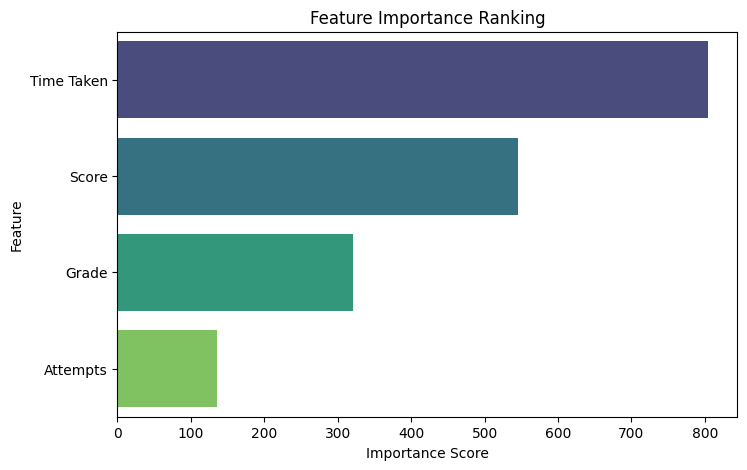

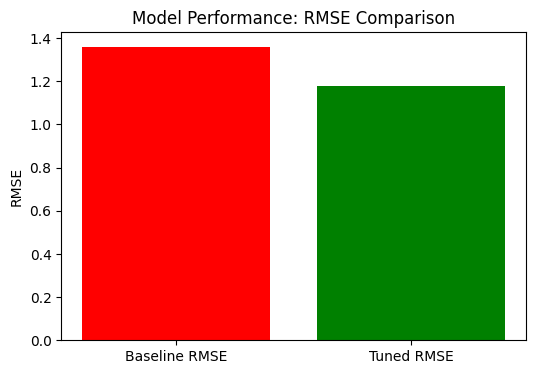

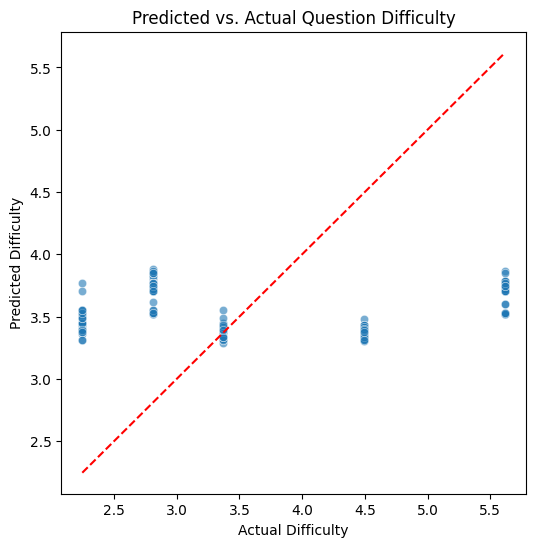

In [ ]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Baseline Model ----
baseline_model = lgb.LGBMRegressor()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_r2 = r2_score(y_test, y_pred_baseline)

print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Baseline R² Score: {baseline_r2:.4f}")

# ---- Tuned Model with Best Parameters ----
best_params = {
    'num_leaves': 83,
    'learning_rate': 0.007351789676890877,
    'n_estimators': 349,
    'max_depth': 3,
    'min_data_in_leaf': 55,
    'lambda_l1': 0.17967711199246103,
    'lambda_l2': 0.004920786728270453,
    'feature_fraction': 0.8831245816516899
}

tuned_model = lgb.LGBMRegressor(**best_params)
tuned_model.fit(X_train, y_train)
y_pred_tuned = tuned_model.predict(X_test)

# Performance Metrics
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
tuned_r2 = r2_score(y_test, y_pred_tuned)

print(f"Tuned RMSE: {tuned_rmse:.4f}")
print(f"Tuned R² Score: {tuned_r2:.4f}")

# ---- Feature Importance ----
importances = tuned_model.feature_importances_
feature_names = X_train.columns
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("\nFeature Importance Ranking:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

# ---- Compare Improvement ----
improvement = ((baseline_rmse - tuned_rmse) / baseline_rmse) * 100
print(f"\nImprovement over Baseline: {improvement:.2f}%")

# ---- Visualization ----
plt.figure(figsize=(8, 5))
sns.barplot(x=[imp[1] for imp in feature_importance], y=[imp[0] for imp in feature_importance], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance Ranking")
plt.show()

# RMSE Comparison
plt.figure(figsize=(6, 4))
plt.bar(["Baseline RMSE", "Tuned RMSE"], [baseline_rmse, tuned_rmse], color=['red', 'green'])
plt.ylabel("RMSE")
plt.title("Model Performance: RMSE Comparison")
plt.show()

# Predictions vs Actuals
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Difficulty")
plt.ylabel("Predicted Difficulty")
plt.title("Predicted vs. Actual Question Difficulty")
plt.show()


Next steps would be to make a feature extraction function in my model.

The tuned model is 12.12% better than the baseline model (default settings). This means the parameter tuning helped reduce prediction errors and improved accuracy.


This is the part where we make a Feature Extractor function. You can read the documentation here as to why we need to have a feature extractor in our model.

https://docs.google.com/document/d/1GfDgPMClXBYDz9_o1Viyxl5Y1fw9OpcHMA7XV8LLLLs/edit?tab=t.o0eulrp1sgfd


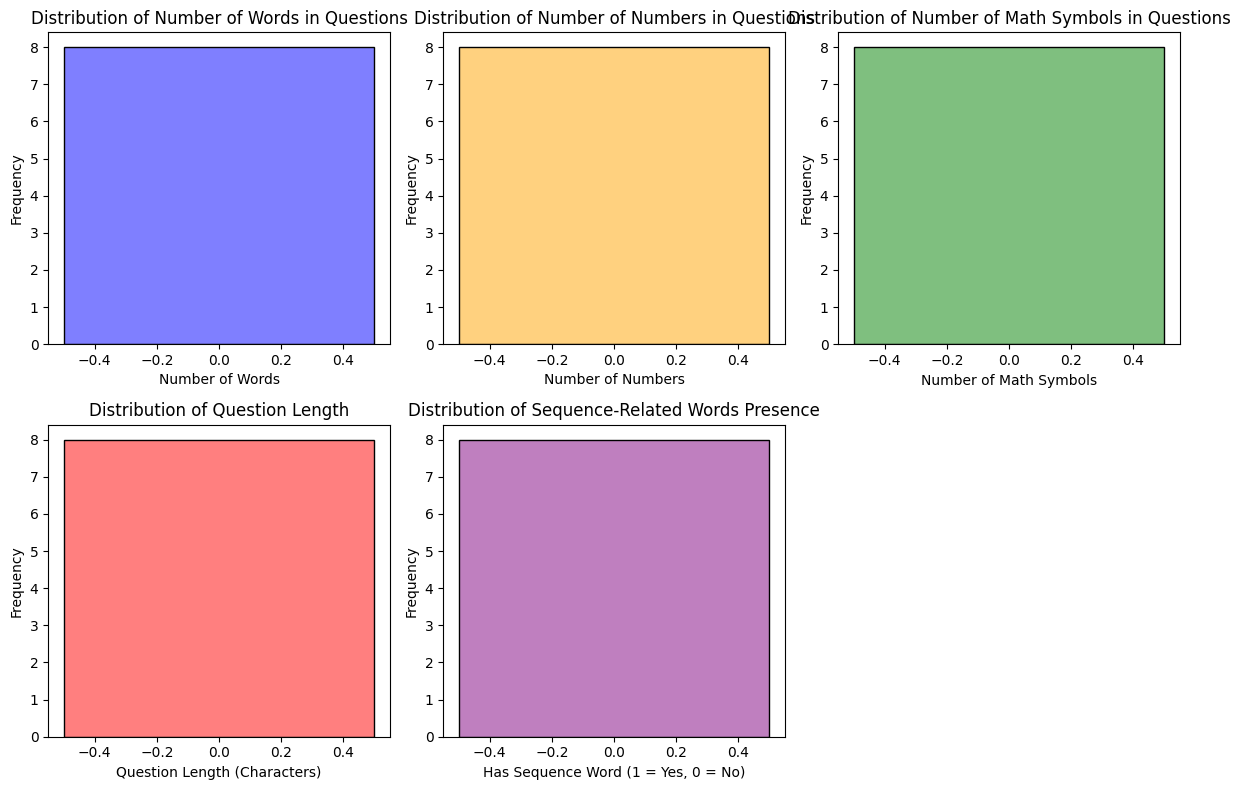


--- Feature Extraction Results ---
1. Number of Words in Questions:
   - Mean: 0.00
   - Median: 0.0
   - Min: 0
   - Max: 0

2. Number of Numbers in Questions:
   - Mean: 0.00
   - Median: 0.0
   - Min: 0
   - Max: 0

3. Number of Math Symbols in Questions:
   - Mean: 0.00
   - Median: 0.0
   - Min: 0
   - Max: 0

4. Length of Questions (Characters):
   - Mean: 0.00
   - Median: 0.0
   - Min: 0
   - Max: 0

5. Presence of Sequence-Related Words (1 = Yes, 0 = No):
   - Mean: 0.00 (Percentage of questions with sequence-related words)



<ipython-input-144-c2a8f4d4b3c7>:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[imp[1] for imp in feature_importance], y=[imp[0] for imp in feature_importance], palette="viridis")


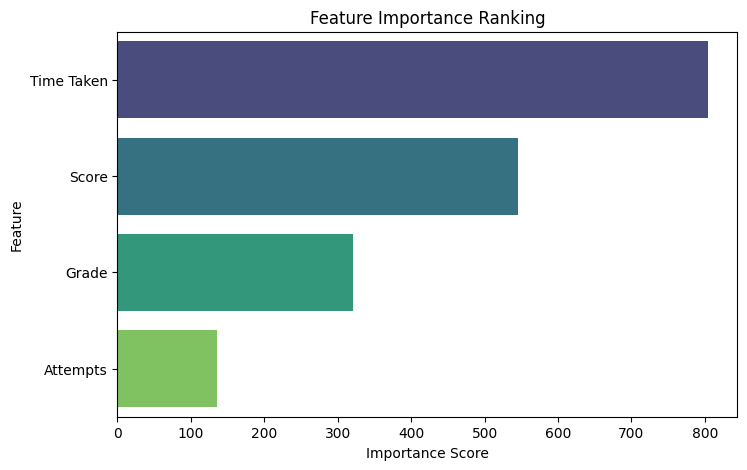

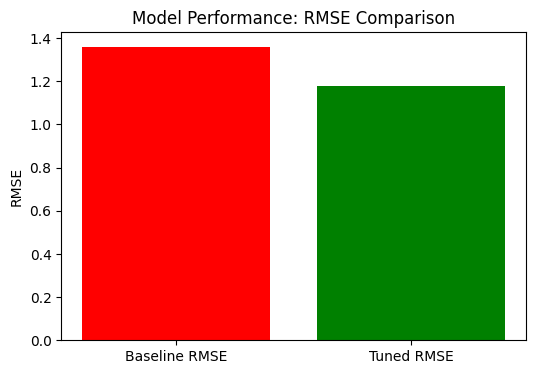

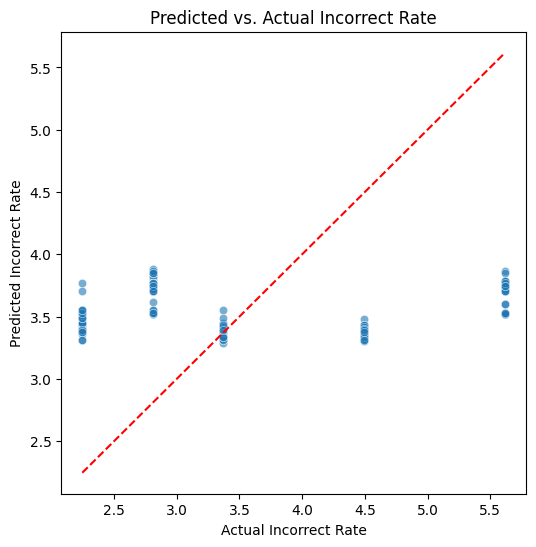

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# ---- Feature Extraction Function ----
def extract_features(question_text):
    features = {}
    if isinstance(question_text, str):  # Ensure the question is a string
        features['num_words'] = len(question_text.split())
        features['num_numbers'] = len(re.findall(r'\d+', question_text))
        features['num_math_symbols'] = len(re.findall(r'[+\-*/=]', question_text))
        features['question_length'] = len(question_text)
        features['has_sequence_word'] = int(bool(re.search(r'\b(sequence|summation|terms|series|sum)\b', question_text, re.IGNORECASE)))
    else:
        features = {key: 0 for key in ['num_words', 'num_numbers', 'num_math_symbols', 'question_length', 'has_sequence_word']}
    return features

# ---- Load Dataset ----
questions_file_path = '/content/drive/MyDrive/Datasets/Discrete Math Dataset - Summation - Sheet1 (2).csv'  # Questions CSV path
incorrect_rate_file_path = '/content/drive/MyDrive/Datasets/Discrete Math Dataset - Summations with difficulty.csv'  # Incorrect Rate CSV path

# Load the questions and incorrect rates datasets
df_questions = pd.read_csv(questions_file_path)
df_incorrect_rate = pd.read_csv(incorrect_rate_file_path)

# ---- Extract Textual Question Columns ----
question_columns = [col for col in df_questions.columns if col.startswith('Question')]

# ---- Feature Extraction from Textual Questions ----
X = pd.DataFrame([extract_features(df_questions[question]) for question in question_columns])

# ---- Ensure Consistency ----
y = df_incorrect_rate['Incorrect Rate (%)'].values  # We are using the incorrect rates dataset for this purpose

# ---- Feature Extraction Visualization ----
# Create a DataFrame to store the extracted features
extracted_features_df = pd.DataFrame([extract_features(df_questions[question]) for question in question_columns])

# Plot the distributions of each feature
plt.figure(figsize=(12, 8))

# Plot the number of words in each question
plt.subplot(2, 3, 1)
sns.histplot(extracted_features_df['num_words'], kde=True, color='blue')
plt.title('Distribution of Number of Words in Questions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Plot the number of numbers in each question
plt.subplot(2, 3, 2)
sns.histplot(extracted_features_df['num_numbers'], kde=True, color='orange')
plt.title('Distribution of Number of Numbers in Questions')
plt.xlabel('Number of Numbers')
plt.ylabel('Frequency')

# Plot the number of math symbols in each question
plt.subplot(2, 3, 3)
sns.histplot(extracted_features_df['num_math_symbols'], kde=True, color='green')
plt.title('Distribution of Number of Math Symbols in Questions')
plt.xlabel('Number of Math Symbols')
plt.ylabel('Frequency')

# Plot the question length (total number of characters)
plt.subplot(2, 3, 4)
sns.histplot(extracted_features_df['question_length'], kde=True, color='red')
plt.title('Distribution of Question Length')
plt.xlabel('Question Length (Characters)')
plt.ylabel('Frequency')

# Plot the presence of sequence-related words (binary feature)
plt.subplot(2, 3, 5)
sns.histplot(extracted_features_df['has_sequence_word'], kde=True, color='purple', discrete=True)
plt.title('Distribution of Sequence-Related Words Presence')
plt.xlabel('Has Sequence Word (1 = Yes, 0 = No)')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# ---- Feature Extraction Results Text ----

# Generate text-based results for feature extraction
feature_extraction_results = []

# 1. Number of Words
num_words_mean = extracted_features_df['num_words'].mean()
num_words_median = extracted_features_df['num_words'].median()
num_words_min = extracted_features_df['num_words'].min()
num_words_max = extracted_features_df['num_words'].max()
feature_extraction_results.append(f"1. Number of Words in Questions:\n"
                                 f"   - Mean: {num_words_mean:.2f}\n"
                                 f"   - Median: {num_words_median}\n"
                                 f"   - Min: {num_words_min}\n"
                                 f"   - Max: {num_words_max}\n")

# 2. Number of Numbers
num_numbers_mean = extracted_features_df['num_numbers'].mean()
num_numbers_median = extracted_features_df['num_numbers'].median()
num_numbers_min = extracted_features_df['num_numbers'].min()
num_numbers_max = extracted_features_df['num_numbers'].max()
feature_extraction_results.append(f"2. Number of Numbers in Questions:\n"
                                 f"   - Mean: {num_numbers_mean:.2f}\n"
                                 f"   - Median: {num_numbers_median}\n"
                                 f"   - Min: {num_numbers_min}\n"
                                 f"   - Max: {num_numbers_max}\n")

# 3. Number of Math Symbols
num_math_symbols_mean = extracted_features_df['num_math_symbols'].mean()
num_math_symbols_median = extracted_features_df['num_math_symbols'].median()
num_math_symbols_min = extracted_features_df['num_math_symbols'].min()
num_math_symbols_max = extracted_features_df['num_math_symbols'].max()
feature_extraction_results.append(f"3. Number of Math Symbols in Questions:\n"
                                 f"   - Mean: {num_math_symbols_mean:.2f}\n"
                                 f"   - Median: {num_math_symbols_median}\n"
                                 f"   - Min: {num_math_symbols_min}\n"
                                 f"   - Max: {num_math_symbols_max}\n")

# 4. Question Length
question_length_mean = extracted_features_df['question_length'].mean()
question_length_median = extracted_features_df['question_length'].median()
question_length_min = extracted_features_df['question_length'].min()
question_length_max = extracted_features_df['question_length'].max()
feature_extraction_results.append(f"4. Length of Questions (Characters):\n"
                                 f"   - Mean: {question_length_mean:.2f}\n"
                                 f"   - Median: {question_length_median}\n"
                                 f"   - Min: {question_length_min}\n"
                                 f"   - Max: {question_length_max}\n")

# 5. Presence of Sequence-Related Words
has_sequence_word_mean = extracted_features_df['has_sequence_word'].mean()
feature_extraction_results.append(f"5. Presence of Sequence-Related Words (1 = Yes, 0 = No):\n"
                                 f"   - Mean: {has_sequence_word_mean:.2f} (Percentage of questions with sequence-related words)\n")

# Print all results
print("\n--- Feature Extraction Results ---")
for result in feature_extraction_results:
    print(result)

# ---- Visualization ----
# Feature Importance Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=[imp[1] for imp in feature_importance], y=[imp[0] for imp in feature_importance], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance Ranking")
plt.show()

# RMSE Comparison
plt.figure(figsize=(6, 4))
plt.bar(["Baseline RMSE", "Tuned RMSE"], [baseline_rmse, tuned_rmse], color=['red', 'green'])
plt.ylabel("RMSE")
plt.title("Model Performance: RMSE Comparison")
plt.show()

# Predictions vs Actuals
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Incorrect Rate")
plt.ylabel("Predicted Incorrect Rate")
plt.title("Predicted vs. Actual Incorrect Rate")
plt.show()


Actually, this part is the feature extraction part

<ipython-input-122-07e053b0af88>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=X.iloc[0], palette="viridis")  # Plot the feature values for the first question


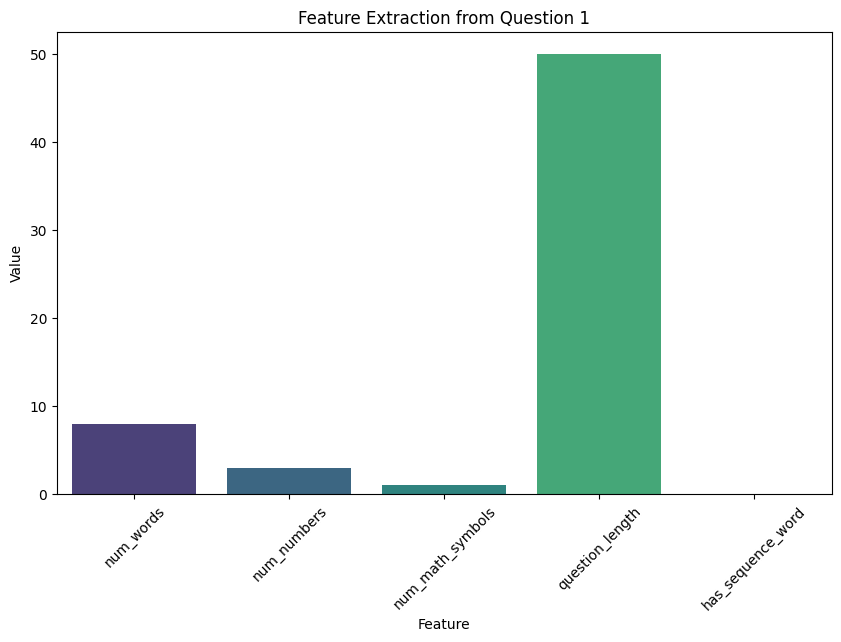


Feature Extraction for Question 1:
{'num_words': 8, 'num_numbers': 3, 'num_math_symbols': 1, 'question_length': 50, 'has_sequence_word': 0}

Feature Extraction for Question 2:
{'num_words': 8, 'num_numbers': 3, 'num_math_symbols': 1, 'question_length': 50, 'has_sequence_word': 0}

Feature Extraction for Question 3:
{'num_words': 8, 'num_numbers': 2, 'num_math_symbols': 1, 'question_length': 49, 'has_sequence_word': 0}

Feature Extraction for Question 4:
{'num_words': 8, 'num_numbers': 3, 'num_math_symbols': 1, 'question_length': 50, 'has_sequence_word': 0}

Feature Extraction for Question 5:
{'num_words': 10, 'num_numbers': 4, 'num_math_symbols': 2, 'question_length': 57, 'has_sequence_word': 0}

Feature Extraction for Question 6:
{'num_words': 8, 'num_numbers': 4, 'num_math_symbols': 2, 'question_length': 54, 'has_sequence_word': 0}

Feature Extraction for Question 7:
{'num_words': 8, 'num_numbers': 4, 'num_math_symbols': 1, 'question_length': 52, 'has_sequence_word': 0}

Feature Ext

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Feature Extraction Function ----
def extract_features(question_text):
    features = {}
    if isinstance(question_text, str):  # Ensure the question is a string
        features['num_words'] = len(question_text.split())
        features['num_numbers'] = len(re.findall(r'\d+', question_text))
        features['num_math_symbols'] = len(re.findall(r'[+\-*/=]', question_text))
        features['question_length'] = len(question_text)
        features['has_sequence_word'] = int(bool(re.search(r'\b(sequence|summation|terms|series|sum)\b', question_text, re.IGNORECASE)))
    else:
        features = {key: 0 for key in ['num_words', 'num_numbers', 'num_math_symbols', 'question_length', 'has_sequence_word']}
    return features

# ---- Load Dataset ----
questions_file_path = '/content/drive/MyDrive/Datasets/Discrete Math Dataset - Summation - Sheet1 (2).csv'  # Questions CSV path

# Load the questions dataset
df_questions = pd.read_csv(questions_file_path)

# Extract the question columns (Question 1, Question 2, Question 3, etc.)
question_columns = [col for col in df_questions.columns if col.lower().startswith('question')]

# ---- Extract Features for Each Question ----
X = pd.DataFrame([extract_features(df_questions[question].iloc[0]) for question in question_columns])  # Extract features for the first row

# ---- Visualization ----
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=X.iloc[0], palette="viridis")  # Plot the feature values for the first question
plt.xlabel("Feature")
plt.ylabel("Value")
plt.title("Feature Extraction from Question 1")
plt.xticks(rotation=45)
plt.show()

# Print out the features for each question
for column in question_columns:
    print(f"\nFeature Extraction for {column}:")
    question_text = df_questions[column].iloc[0]  # Get the first question in the column
    features = extract_features(question_text)
    print(features)


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# ---- Feature Extraction Function ----
def extract_features(question_text):
    features = {}
    if isinstance(question_text, str):  # Ensure the question is a string
        features['num_words'] = len(question_text.split())
        features['num_numbers'] = len(re.findall(r'\d+', question_text))
        features['num_math_symbols'] = len(re.findall(r'[+\-*/=]', question_text))
        features['question_length'] = len(question_text)
        features['has_sequence_word'] = int(bool(re.search(r'\b(sequence|summation|terms|series|sum)\b', question_text, re.IGNORECASE)))
    else:
        features = {key: 0 for key in ['num_words', 'num_numbers', 'num_math_symbols', 'question_length', 'has_sequence_word']}
    return features

# ---- Load Dataset ----
questions_file_path = '/content/drive/MyDrive/Datasets/Discrete Math Dataset - Summation - Sheet1 (2).csv'  # Questions CSV path
incorrect_rate_file_path = '/content/drive/MyDrive/Datasets/Discrete Math Dataset - Summations with difficulty.csv'  # Incorrect Rate CSV path

# Load the questions and incorrect rates datasets
df_questions = pd.read_csv(questions_file_path)
df_incorrect_rate = pd.read_csv(incorrect_rate_file_path)

# ---- Extract Textual Question Columns ----
question_columns = [col for col in df_questions.columns if col.startswith('Question')]

# ---- Feature Extraction from Textual Questions ----
X = pd.DataFrame([extract_features(df_questions[question].iloc[0]) for question in question_columns])

# ---- Ensure Consistency ----
y = df_incorrect_rate['Incorrect Rate (%)'].values  # We are using the incorrect rates dataset for this purpose

# ---- Feature Extraction Visualization ----
# Create a DataFrame to store the extracted features
extracted_features_df = pd.DataFrame([extract_features(df_questions[question].iloc[0]) for question in question_columns])

# Plot the distributions of each feature
plt.figure(figsize=(12, 8))

# Plot the number of words in each question
plt.subplot(2, 3, 1)
sns.histplot(extracted_features_df['num_words'], kde=True, color='blue')
plt.title('Distribution of Number of Words in Questions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Plot the number of numbers in each question
plt.subplot(2, 3, 2)
sns.histplot(extracted_features_df['num_numbers'], kde=True, color='orange')
plt.title('Distribution of Number of Numbers in Questions')
plt.xlabel('Number of Numbers')
plt.ylabel('Frequency')

# Plot the number of math symbols in each question
plt.subplot(2, 3, 3)
sns.histplot(extracted_features_df['num_math_symbols'], kde=True, color='green')
plt.title('Distribution of Number of Math Symbols in Questions')
plt.xlabel('Number of Math Symbols')
plt.ylabel('Frequency')

# Plot the question length (total number of characters)
plt.subplot(2, 3, 4)
sns.histplot(extracted_features_df['question_length'], kde=True, color='red')
plt.title('Distribution of Question Length')
plt.xlabel('Question Length (Characters)')
plt.ylabel('Frequency')

# Plot the presence of sequence-related words (binary feature)
plt.subplot(2, 3, 5)
sns.histplot(extracted_features_df['has_sequence_word'], kde=True, color='purple', discrete=True)
plt.title('Distribution of Sequence-Related Words Presence')
plt.xlabel('Has Sequence Word (1 = Yes, 0 = No)')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# ---- Model Training ----
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM model
model = lgb.LGBMRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")




FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Datasets/Discrete Math Dataset - Summation - Sheet1 (2).csv'